In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.10" 2021-01-19
OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04)
OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)


In [ ]:
!pip install handyspark
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q elephas
!pip install --ignore-installed PyYAML

  Using cached https://files.pythonhosted.org/packages/7a/a5/393c087efdc78091afa2af9f1378762f9821c9c1d7a22c5753fb5ac5f97a/PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl


In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"
import findspark
findspark.init()

In [ ]:
from google.colab import files
files.upload()

Saving CS551G_DMV_Assessment_2_Dataset.xlsx to CS551G_DMV_Assessment_2_Dataset (1).xlsx


{'CS551G_DMV_Assessment_2_Dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x87V\xe12\x86\x01\x00\x00\x99\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [ ]:
import pandas as pd
from handyspark import *
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, DoubleType
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers.core import Dense, Dropout, Activation
from tensorflow.python.keras.utils import np_utils, generic_utils
from tensorflow.python.keras import optimizers
from pyspark.ml.classification import RandomForestClassifier, MultilayerPerceptronClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer, VectorAssembler, StandardScaler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator,BinaryClassificationEvaluator
from elephas.ml_model import ElephasEstimator
from pyspark.ml import Pipeline
import matplotlib.pyplot as plt

df = pd.read_excel("CS551G_DMV_Assessment_2_Dataset.xlsx")

In [ ]:
spark=SparkSession.builder.getOrCreate()
data=spark.createDataFrame(df)
data.select('Temperature_Sensor_1',	'Temperature_Sensor_2','Temperature_Sensor_3').summary().show()
data.select('Flow_Rate_Sensor_1',	'Flow_Rate_Sensor_2','Flow_Rate_Sensor_3').summary().show()
data.select('Pressure _sensor_1',	'Pressure _sensor_2','Pressure _sensor_3').summary().show()
data.select('Vibration_Sensor_1',	'Vibration_Sensor_2','Vibration_Sensor_3').summary().show()

+-------+--------------------+--------------------+--------------------+
|summary|Temperature_Sensor_1|Temperature_Sensor_2|Temperature_Sensor_3|
+-------+--------------------+--------------------+--------------------+
|  count|                 996|                 996|                 996|
|   mean|  4.9995738935742935|   6.379273152610439|   9.228112114457828|
| stddev|   2.764855518719287|   2.312568802265547|   2.532172890894333|
|    min|              0.0082|              0.0403|            2.583966|
|    25%|              2.8894|              4.9283|              7.5018|
|    50%|              4.8788|              6.4691|              9.3347|
|    75%|              6.7877|              8.0988|             11.0468|
|    max|             12.1298|             11.9284|             15.7599|
+-------+--------------------+--------------------+--------------------+

+-------+------------------+------------------+------------------+
|summary|Flow_Rate_Sensor_1|Flow_Rate_Sensor_2|Flow_Rate

In [ ]:
data.filter("Temperature_Sensor_1 is null").select('Temperature_Sensor_1').show()
data.filter("Temperature_Sensor_2 is null").select('Temperature_Sensor_2').show()
data.filter("Temperature_Sensor_3 is null").select('Temperature_Sensor_3').show()
data.filter("Flow_Rate_Sensor_1 is null").select('Flow_Rate_Sensor_1').show()
data.filter("Flow_Rate_Sensor_2 is null").select('Flow_Rate_Sensor_2').show()
data.filter("Flow_Rate_Sensor_3 is null").select('Flow_Rate_Sensor_3').show()
# data.filter("Pressure _sensor_1 is null").select('Pressure _sensor_1').show()
# data.filter("Pressure _sensor_2 is null").select('Pressure _sensor_2').show()
# data.filter("Pressure _sensor_3 is null").select('Pressure _sensor_3').show()
data.filter("Vibration_Sensor_1 is null").select('Vibration_Sensor_1').show()
data.filter("Vibration_Sensor_2 is null").select('Vibration_Sensor_2').show()
data.filter("Vibration_Sensor_3 is null").select('Vibration_Sensor_3').show()

+--------------------+
|Temperature_Sensor_1|
+--------------------+
+--------------------+

+--------------------+
|Temperature_Sensor_2|
+--------------------+
+--------------------+

+--------------------+
|Temperature_Sensor_3|
+--------------------+
+--------------------+

+------------------+
|Flow_Rate_Sensor_1|
+------------------+
+------------------+

+------------------+
|Flow_Rate_Sensor_2|
+------------------+
+------------------+

+------------------+
|Flow_Rate_Sensor_3|
+------------------+
+------------------+

+------------------+
|Vibration_Sensor_1|
+------------------+
+------------------+

+------------------+
|Vibration_Sensor_2|
+------------------+
+------------------+

+------------------+
|Vibration_Sensor_3|
+------------------+
+------------------+



# **Question 1** 
Code can be found in ***Solution_BigData_Practical_4_Exercise.ipynb***


 **Summary statistics**




# **Check missing value**

In [ ]:
print ("Empty values: {}.".format(df.isnull().values.any()))

Empty values: False.


# **Question 2**




# Plots demo：
https://matplotlib.org/stable/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py

handyspark

https://dvgodoy.github.io/handyspark/handyspark.ml.html#handyspark.ml.base.HandyTransformers

Tips:

Some features are not included in Spark3.0 

(<Figure size 432x288 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f69cd5fa090>])

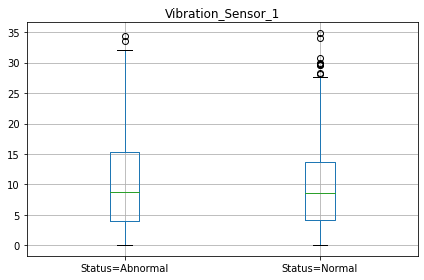

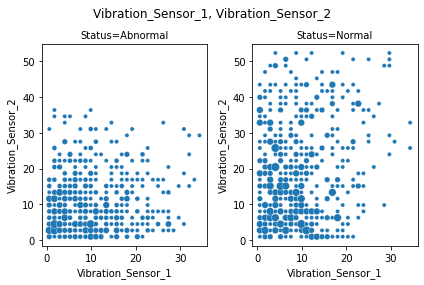

In [ ]:
# Load and parse the data file, converting it to a DataFrame.
path_csv="CS551G_DMV_Assessment_2_Dataset.csv"
df.to_csv(path_csv)
data = spark.read.csv(path_csv, header=True, inferSchema=True)
data = data.withColumn("Temperature_Sensor_1", data["Temperature_Sensor_1"].cast(DoubleType()))
data = data.withColumn("Temperature_Sensor_2", data["Temperature_Sensor_2"].cast(DoubleType()))
data = data.withColumn("Temperature_Sensor_3", data["Temperature_Sensor_3"].cast(DoubleType()))
data = data.withColumn("Flow_Rate_Sensor_1", data["Flow_Rate_Sensor_1"].cast(DoubleType()))
data = data.withColumn("Flow_Rate_Sensor_2", data["Flow_Rate_Sensor_2"].cast(DoubleType()))
data = data.withColumn("Flow_Rate_Sensor_3", data["Flow_Rate_Sensor_3"].cast(DoubleType()))
data = data.withColumn("Pressure _sensor_1", data["Pressure _sensor_1"].cast(DoubleType()))
data = data.withColumn("Pressure _sensor_2", data["Pressure _sensor_2"].cast(DoubleType()))
data = data.withColumn("Pressure _sensor_3", data["Pressure _sensor_3"].cast(DoubleType()))
data = data.withColumn("Vibration_Sensor_1", data["Vibration_Sensor_1"].cast(DoubleType()))
data = data.withColumn("Vibration_Sensor_2", data["Vibration_Sensor_2"].cast(DoubleType()))
data = data.withColumn("Vibration_Sensor_3", data["Vibration_Sensor_3"].cast(DoubleType()))
hdf=data.toHandy()
hdf.stratify('Status').cols['Vibration_Sensor_1'].boxplot()
hdf.stratify('Status').cols[['Vibration_Sensor_1','Vibration_Sensor_2']].scatterplot()


# **MPL Demo**
https://cloud.tencent.com/developer/article/1699655

https://blog.csdn.net/qq_19446965/article/details/108066957

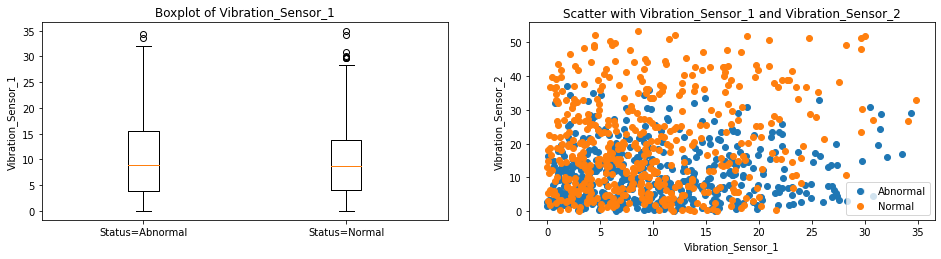

In [ ]:
df = pd.read_csv('CS551G_DMV_Assessment_2_Dataset.csv')
df_normal=df[df['Status']=='Normal']
df_abnormal=df[df['Status']=='Abnormal']
df_abnormal.head()

fig = plt.figure(figsize=(16, 8))
# creat box plot
ax1 = fig.add_subplot(221)
ax1.boxplot([df_abnormal['Vibration_Sensor_1'],df_normal['Vibration_Sensor_1']],labels=['Status=Abnormal','Status=Normal'])
ax1.set_title('Boxplot of Vibration_Sensor_1')
ax1.set_ylabel('Vibration_Sensor_1')
# creat scatter plot
ax2 = fig.add_subplot(222)
ax2.scatter(df_abnormal['Vibration_Sensor_1'],df_abnormal['Vibration_Sensor_2'], color='#1f77b4', label='Abnormal')
ax2.scatter(df_normal['Vibration_Sensor_1'],df_normal['Vibration_Sensor_2'], color='#ff7f0e', label='Normal')
ax2.set_title('Scatter with Vibration_Sensor_1 and Vibration_Sensor_2')
ax2.set_ylabel('Vibration_Sensor_2')
ax2.set_xlabel('Vibration_Sensor_1')
plt.legend()
plt.show()



# **Question 3**

# **Train the random forest classifier**
官方文档

https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier

CSDN 教学

1)
https://blog.csdn.net/qq_41610493/article/details/106938186?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161686883916780255285032%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161686883916780255285032&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-1-106938186.pc_search_result_before_js&utm_term=SPARK+random+forest+%E6%95%99%E5%AD%A6

2)
https://blog.csdn.net/dise0092/article/details/77893083?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161686883916780255258710%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=161686883916780255258710&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_v2~rank_v29-9-77893083.pc_search_result_before_js&utm_term=SPARK+random+forest+%E6%95%99%E5%AD%A6

3)MulticlassClassificationEvaluator SKLearn的weight模式影响结果

https://blog.csdn.net/Wang_xPP/article/details/104615416

In [ ]:
data = spark.read.csv(path_csv, header=True, inferSchema=True)
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Status", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
featureIndexer = VectorAssembler(
    inputCols=['Temperature_Sensor_1','Temperature_Sensor_2','Temperature_Sensor_3',
              'Flow_Rate_Sensor_1','Flow_Rate_Sensor_2','Flow_Rate_Sensor_3',
              'Pressure _sensor_1','Pressure _sensor_2','Pressure _sensor_3',
              'Vibration_Sensor_1',	'Vibration_Sensor_2','Vibration_Sensor_3'],
    outputCol="indexedFeatures")
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])
# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=15)
# Chain indexers and model in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)
# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "indexedLabel", "indexedFeatures").show(5)
# Select (prediction, true label) and compute test error
evaluator_acc = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedRecall")
evaluator_auc = BinaryClassificationEvaluator(labelCol='indexedLabel', metricName="areaUnderROC")
accuracy = evaluator_acc.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
auroc = evaluator_auc.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print('Accuracy : {}\nPrecision : {}\nRecall : {}\nAUROC : {}'.format(accuracy,precision,recall,auroc))
rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+------------+--------------------+
|predictedLabel|indexedLabel|     indexedFeatures|
+--------------+------------+--------------------+
|      Abnormal|         0.0|[4.5044,0.7443,6....|
|      Abnormal|         0.0|[4.4284,0.9073,5....|
|        Normal|         0.0|[5.2258,0.6125,7....|
|        Normal|         0.0|[5.8438,1.1902,5....|
|        Normal|         0.0|[5.2075,1.4804,5....|
+--------------+------------+--------------------+
only showing top 5 rows

Test Error = 0.14511
Accuracy : 0.8548895899053628
Precision : 0.8636583405422925
Recall : 0.8548895899053628
AUROC : 0.9304858622062921
RandomForestClassificationModel (uid=RandomForestClassifier_0c8a84276a65) with 15 trees


# **Quetions 5**

# **Train the multilayer perceptron classifier**

In [ ]:
data = spark.read.csv(path_csv, header=True, inferSchema=True)
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Status", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
featureIndexer = VectorAssembler(
    inputCols=['Temperature_Sensor_1','Temperature_Sensor_2','Temperature_Sensor_3',
              'Flow_Rate_Sensor_1','Flow_Rate_Sensor_2','Flow_Rate_Sensor_3',
              'Pressure _sensor_1','Pressure _sensor_2','Pressure _sensor_3',
              'Vibration_Sensor_1',	'Vibration_Sensor_2','Vibration_Sensor_3'],
    outputCol="indexedFeatures")
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])
# specify layers for the neural network:
# input layer of size 12 (features), two intermediate of size 5 and 4
# and output of size 2 (classes)
# create the trainer and set its parameters
# train the model
rf = MultilayerPerceptronClassifier(
    featuresCol='indexedFeatures', labelCol='indexedLabel',
    maxIter=100, layers=[12, 5, 4, 2], 
    blockSize=128, seed=1234)
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)
# Chain indexers and model in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("predictedLabel", "indexedLabel", "indexedFeatures").show(5)
evaluator_acc = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="weightedRecall")
evaluator_auc = BinaryClassificationEvaluator(labelCol='indexedLabel', metricName="areaUnderROC")
accuracy = evaluator_acc.evaluate(predictions)
precision = evaluator_precision.evaluate(predictions)
recall = evaluator_recall.evaluate(predictions)
auroc = evaluator_auc.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print('Accuracy : {}\nPrecision : {}\nRecall : {}\nAUROC : {}'.format(accuracy,precision,recall,auroc))
rfModel = model.stages[2]
print(rfModel)  # summary only

+--------------+------------+--------------------+
|predictedLabel|indexedLabel|     indexedFeatures|
+--------------+------------+--------------------+
|      Abnormal|         0.0|[5.1727,1.0007,7....|
|      Abnormal|         0.0|[4.8834,0.5786,5....|
|      Abnormal|         0.0|[5.625,0.0403,7.7...|
|      Abnormal|         0.0|[6.4215,0.5978,5....|
|        Normal|         0.0|[5.2075,1.4804,5....|
+--------------+------------+--------------------+
only showing top 5 rows

Test Error = 0.246875
Accuracy : 0.753125
Precision : 0.7540149201127819
Recall : 0.753125
AUROC : 0.8122582913395053
MultilayerPerceptronClassifier_d5c927c59f9d


# **Bonus**
Create a distributed keras model using the package elephas

1)
https://github.com/maxpumperla/elephas/blob/master/examples/Spark_ML_Pipeline.ipynb

2)
tutotial-bigdata-elephas.ipynb

In [ ]:
from tensorflow.keras import optimizers
data = spark.read.csv(path_csv, header=True, inferSchema=True)
# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Status", outputCol="indexedLabel").fit(data)
# Automatically identify categorical features, and index them.
featureIndexer = VectorAssembler(
    inputCols=['Temperature_Sensor_1','Temperature_Sensor_2','Temperature_Sensor_3',
              'Flow_Rate_Sensor_1','Flow_Rate_Sensor_2','Flow_Rate_Sensor_3',
              'Pressure _sensor_1','Pressure _sensor_2','Pressure _sensor_3',
              'Vibration_Sensor_1',	'Vibration_Sensor_2','Vibration_Sensor_3'],
    outputCol="indexedFeatures")
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",labels=labelIndexer.labels)
# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7, 0.3])

DataFrame[_c0: int, Status: string, Temperature_Sensor_1: double, Temperature_Sensor_2: double, Temperature_Sensor_3: double, Flow_Rate_Sensor_1: double, Flow_Rate_Sensor_2: double, Flow_Rate_Sensor_3: double, Pressure _sensor_1: double, Pressure _sensor_2: double, Pressure _sensor_3: double, Vibration_Sensor_1: double, Vibration_Sensor_2: double, Vibration_Sensor_3: double]


In [ ]:

# Build a keras model with 3 dense layers, relu activation function 
# and dropout layers after each dense layer
nb_classes = trainingData.select("Status").distinct().count()
model = Sequential()
model.add(Dense(512, input_shape=(12,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

adam = optimizers.Adam(lr=0.003)
opt_conf = optimizers.serialize(adam)
# Initialize SparkML Estimator and set all relevant properties
estimator = ElephasEstimator()
estimator.setFeaturesCol("indexedFeatures")             # These two come directly from pyspark,
estimator.setLabelCol("indexedLabel")                 # hence the camel case. Sorry :)
estimator.set_keras_model_config(model.to_yaml())       # Provide serialized Keras model
estimator.set_categorical_labels(True)
estimator.set_nb_classes(nb_classes)
estimator.set_num_workers(1)  # We just use one worker here. Feel free to adapt it.
estimator.set_epochs(20) 
estimator.set_batch_size(128)
estimator.set_verbosity(1)
estimator.set_validation_split(0.15)
estimator.set_optimizer_config(opt_conf)
estimator.set_mode("synchronous")
estimator.set_loss("categorical_crossentropy")
estimator.set_metrics(['acc'])

# Chain indexers and model in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, estimator, labelConverter])
# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)
# testData.show()
# Make predictions.
predictions = model.transform(testData)
# Select example rows to display.
predictions.select("predictedLabel", "indexedLabel", "indexedFeatures").show(5)
evaluator_acc = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", 
    predictionCol="prediction", 
    metricName="accuracy")
accuracy = evaluator_acc.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))
print('Accuracy : {}'.format(accuracy))
rfModel = model.stages[2]
print(rfModel)  # summary only